In [1]:
import numpy as np
import sympy as sp

In [2]:
t, m, g, k = sp.symbols('t, m, g, k')

In [3]:
# get independent variables symbols
the1 = sp.Function(r'\theta_1')(t)
the2 = sp.Function(r'\theta_2')(t)

r1 = sp.Function(r'r_1')(t)
r2 = sp.Function(r'r_2')(t)

# get their derivatives symbols
the1_d = sp.diff(the1, t)
the1_dd = sp.diff(the1_d, t)

the2_d = sp.diff(the2, t)
the2_dd = sp.diff(sp.diff(the2, t), t)

r1_d = sp.diff(r1, t)
r1_dd = sp.diff(sp.diff(r1, t), t)

r2_d = sp.diff(r2, t)
r2_dd = sp.diff(sp.diff(r2, t), t)

# create symbol aliases for functions
the1_T = sp.Symbol(r'\theta_1')
the2_T = sp.Symbol(r'\theta_2')
r1_T = sp.Symbol(r'r_1')
r2_T = sp.Symbol(r'r_2')

the1_d_T = sp.Symbol(r'\dot{\theta_1}')
the2_d_T = sp.Symbol(r'\dot{\theta_2}')
r1_d_T = sp.Symbol(r'\dot{r_1}')
r2_d_T = sp.Symbol(r'\dot{r_2}')

the1_dd_T = sp.Symbol(r'\ddot{\theta_1}')
the2_dd_T = sp.Symbol(r'\ddot{\theta_2}')
r1_dd_T = sp.Symbol(r'\ddot{r_1}')
r2_dd_T = sp.Symbol(r'\ddot{r_2}')

to_sym = {
  the1 : the1_T,
  the2 : the2_T,
  r1 : r1_T,
  r2 : r2_T,

  the1_d : the1_d_T,
  the2_d : the2_d_T,
  r1_d : r1_d_T,
  r2_d : r2_d_T,

  the1_dd : the1_dd_T,
  the2_dd : the2_dd_T,
  r1_dd : r1_dd_T,
  r2_dd : r2_dd_T,
}

to_func = dict(zip(to_sym.values(), to_sym.keys())) # reversed dict

In [4]:
# get cartesian coords from r and theta
x1 = (1+r1)*sp.sin(the1)
y1 = -(1+r1)*sp.cos(the1)
x2 = (1+r1)*sp.sin(the1) + (1+r2)*sp.sin(the2)
y2 = -(1+r1)*sp.cos(the1) - (1+r2)*sp.cos(the2)

In [5]:
T = 1/2 * m * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2 + \
               sp.diff(x2, t)**2 + + sp.diff(y2, t)**2)
V = m*g*y1 + m*g*y2 + 1/2 * k * r1**2 + 1/2 * k * r2**2
L = T - V

In [6]:
L

-g*m*((-r_1(t) - 1)*cos(\theta_1(t)) - (r_2(t) + 1)*cos(\theta_2(t))) - g*m*(-r_1(t) - 1)*cos(\theta_1(t)) - 0.5*k*r_1(t)**2 - 0.5*k*r_2(t)**2 + 0.5*m*((-(-r_1(t) - 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) - cos(\theta_1(t))*Derivative(r_1(t), t))**2 + ((r_1(t) + 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + sin(\theta_1(t))*Derivative(r_1(t), t))**2 + (-(-r_1(t) - 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (-r_2(t) - 1)*sin(\theta_2(t))*Derivative(\theta_2(t), t) - cos(\theta_1(t))*Derivative(r_1(t), t) - cos(\theta_2(t))*Derivative(r_2(t), t))**2 + ((r_1(t) + 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (r_2(t) + 1)*cos(\theta_2(t))*Derivative(\theta_2(t), t) + sin(\theta_1(t))*Derivative(r_1(t), t) + sin(\theta_2(t))*Derivative(r_2(t), t))**2)

In [7]:
LE1 = sp.diff(L, the1) - sp.diff(sp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [8]:
LE2 = sp.diff(L, the2) - sp.diff(sp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [9]:
LE3 = sp.diff(L, r1) - sp.diff(sp.diff(L, r1_d), t)
LE3 = LE3.simplify()

In [10]:
LE4 = sp.diff(L, r2) - sp.diff(sp.diff(L, r2_d), t)
LE4 = LE4.simplify()

In [11]:
LE1

m*(-2*g*r_1(t)*sin(\theta_1(t)) - 2*g*sin(\theta_1(t)) - 2*r_1(t)**2*Derivative(\theta_1(t), (t, 2)) - r_1(t)*r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - r_1(t)*r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(r_2(t), t) - r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - 4*r_1(t)*Derivative(\theta_1(t), t)*Derivative(r_1(t), t) - 4*r_1(t)*Derivative(\theta_1(t), (t, 2)) - r_2(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - r_2(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) - sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + sin(\theta_1(t) - \theta_2(t))*Derivative(r_2(t), (t, 2)) - 2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)*Derivative(r_

In [12]:
LE4

1.0*g*m*cos(\theta_2(t)) - 1.0*k*r_2(t) + 1.0*m*r_1(t)*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + 1.0*m*r_1(t)*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 1.0*m*r_2(t)*Derivative(\theta_2(t), t)**2 + 2.0*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(r_1(t), t) + 1.0*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + 1.0*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*m*cos(\theta_1(t) - \theta_2(t))*Derivative(r_1(t), (t, 2)) + 1.0*m*Derivative(\theta_2(t), t)**2 - 1.0*m*Derivative(r_2(t), (t, 2))

# Series expansion of Euler-Lagrange equations

In [13]:
eqs = [LE1, LE2, LE3, LE4]

In [14]:
symbols = list(to_func.keys())

In [15]:
reduced_eqs = []

for eq in eqs:
  symeq = eq.subs(to_sym)

  # theta reduction
  symeq = symeq.series(the1_T, n=2).removeO()
  symeq = symeq.series(the2_T, n=2).removeO()

  symeq = symeq.series(the1_d_T, n=2).removeO()
  symeq = symeq.series(the2_d_T, n=2).removeO()

  symeq = symeq.series(the1_dd_T, n=2).removeO()
  symeq = symeq.series(the2_dd_T, n=2).removeO()

  # r reduction
  symeq = symeq.series(r1_T, n=2).removeO()
  symeq = symeq.series(r2_T, n=2).removeO()

  symeq = symeq.series(r1_d_T, n=2).removeO()
  symeq = symeq.series(r2_d_T, n=2).removeO()

  symeq = symeq.series(r1_dd_T, n=2).removeO()
  symeq = symeq.series(r2_dd_T, n=2).removeO()

  # linearization
  for symbol_1 in symbols:
    for symbol_2 in symbols:
      # print("performing reduction of", symbol_1 * symbol_2)
      symeq = (symeq + sp.O(symbol_1 * symbol_2)).removeO()
  
  reduced_eqs.append(symeq.subs(to_func))

In [16]:
reduced_eqs[0]

-2*g*m*\theta_1(t) - 2*m*Derivative(\theta_1(t), (t, 2)) - m*Derivative(\theta_2(t), (t, 2)) + (m*\theta_1(t)*r_1(t) + m*\theta_1(t) - m*\theta_2(t)*r_1(t) - m*\theta_2(t))*Derivative(r_2(t), (t, 2))

In [17]:
reduced_eqs[0] = -2*g*m*the1 -2*m*the1_dd - m*the2_dd
reduced_eqs[0]

-2*g*m*\theta_1(t) - 2*m*Derivative(\theta_1(t), (t, 2)) - m*Derivative(\theta_2(t), (t, 2))

In [18]:
reduced_eqs[1]

-g*m*\theta_2(t) - m*Derivative(\theta_1(t), (t, 2)) - m*Derivative(\theta_2(t), (t, 2)) + (-m*\theta_1(t)*r_2(t) - m*\theta_1(t) + m*\theta_2(t)*r_2(t) + m*\theta_2(t))*Derivative(r_1(t), (t, 2))

In [19]:
reduced_eqs[1] = -g*m*the2 - m*the1_dd - m*the2_dd
reduced_eqs[1]

-g*m*\theta_2(t) - m*Derivative(\theta_1(t), (t, 2)) - m*Derivative(\theta_2(t), (t, 2))

In [20]:
reduced_eqs[2]

2.0*g*m - 1.0*k*r_1(t) - 2.0*m*Derivative(r_1(t), (t, 2)) + (-1.0*m*\theta_1(t)*\theta_2(t) - 1.0*m)*Derivative(r_2(t), (t, 2))

In [21]:
reduced_eqs[2] = 2*g*m - k*r1 - 2*m*r1_dd - m*r2_dd
reduced_eqs[2]

2*g*m - k*r_1(t) - 2*m*Derivative(r_1(t), (t, 2)) - m*Derivative(r_2(t), (t, 2))

In [22]:
reduced_eqs[3]

1.0*g*m - 1.0*k*r_2(t) - 1.0*m*Derivative(r_2(t), (t, 2)) + (-1.0*m*\theta_1(t)*\theta_2(t) - 1.0*m)*Derivative(r_1(t), (t, 2))

In [23]:
reduced_eqs[3] = g*m - k*r2 - m*r2_dd - m*r1_dd
reduced_eqs[3]

g*m - k*r_2(t) - m*Derivative(r_1(t), (t, 2)) - m*Derivative(r_2(t), (t, 2))

In [24]:
sols = sp.solve(reduced_eqs, (the1_dd, the2_dd, r1_dd, r2_dd))

In [25]:
eqs = [
  sols[the1_dd], 
  sols[the2_dd],
  sols[r1_dd], 
  sols[r2_dd],
]

# Analytical solution

In [26]:
# reduced_equalities = [sp.Eq(reduced_eqs[i], 0) for i in range(4)]
reduced_equalities = [
  sp.Eq(the1_dd, eqs[0]),
  sp.Eq(the2_dd, eqs[1]),
  sp.Eq(r1_dd, eqs[2]),
  sp.Eq(r2_dd, eqs[3]),
]

In [27]:
from sympy.solvers.ode.systems import dsolve_system

dsols = dsolve_system(
  reduced_eqs,
  [the1, the2, r1, r2],
  ics={
    the1.subs(t, 0): sp.pi / 12,
    the1_d.subs(t, 0): 0,

    the2.subs(t, 0): 3 * sp.pi / 12,
    the2_d.subs(t, 0): 0,

    r1.subs(t, 0): 0,
    r1_d.subs(t, 0): 2,

    r2.subs(t, 0): 0,
    r2_d.subs(t, 0): 2,
  }
)

In [29]:
dsols[0][0].free_symbols

{C4, g, t}

In [30]:
dsols[0][1].free_symbols

{C4, g, t}

In [31]:
dsols[0][2].free_symbols

{C7, C8, g, k, m, t}

In [32]:
dsols[0][3].free_symbols

{C7, C8, g, k, m, t}

In [34]:
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols("C1, C2, C3, C4, C5, C6, C7, C8")
CS = [C1, C2, C3, C4, C5, C6, C7, C8]

In [35]:
# force remove constants 

analytical_sols = []
for i in range(4):
  dsol = dsols[0][i].rhs

  for C in CS:
    dsol = dsol.subs(C, 0)
  
  dsol = dsol.doit()
  
  analytical_sols.append(dsol)

In [36]:
dsols

[[Eq(\theta_1(t), C4*sqrt(-g)*sqrt(2 - sqrt(2))*exp(t*sqrt(-2*g + sqrt(2)*g))/(2*g*(1 - sqrt(2))) - (C4*sqrt(sqrt(2) + 2)*(g*(-594179*sqrt(2)*sqrt(-g)*sqrt(2 - sqrt(2)) - 9512*sqrt(2)*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 13452*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 840296*sqrt(-g)*sqrt(2 - sqrt(2))) - 626655*sqrt(2)*(-g)**(3/2)*sqrt(2 - sqrt(2)) + 886224*(-g)**(3/2)*sqrt(2 - sqrt(2)))*(g*(-33053*sqrt(2)*sqrt(-g)*sqrt(2 - sqrt(2)) - 1393*sqrt(2)*sqrt(-g)*sqrt(sqrt(2) + 2) - 408*sqrt(2)*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 577*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 1970*sqrt(-g)*sqrt(sqrt(2) + 2) + 46744*sqrt(-g)*sqrt(2 - sqrt(2))) - 35839*sqrt(2)*(-g)**(3/2)*sqrt(2 - sqrt(2)) + 50684*(-g)**(3/2)*sqrt(2 - sqrt(2)))/(4*g**2*(g*(-8770663450*sqrt(2)*sqrt(-g)*(2 - sqrt(2)) + 12403591202*sqrt(-g)*(2 - sqrt(2)) - 20994*sqrt(2 - sqrt(2))*(-192647*sqrt(2)*sqrt(-g)*sqrt(2 - sqrt(2)) - 8119*sqrt(2)*sqrt(-g)*sqrt(sqrt(2) + 2) - 2378*sqrt(2)*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 

In [37]:
analytical_sols[0].free_symbols

{g, t}

In [38]:
the1_f = sp.lambdify((m, k, g, t), analytical_sols[0])
the2_f = sp.lambdify((m, k, g, t), analytical_sols[1])
r1_f = sp.lambdify((m, k, g, t), analytical_sols[2])
r2_f = sp.lambdify((m, k, g, t), analytical_sols[3])

In [39]:
the1_r = lambda m, k, g, t: np.real(the1_f(m, k, g, t))
the2_r = lambda m, k, g, t: np.real(the2_f(m, k, g, t))
r1_r = lambda m, k, g, t: np.real(r1_f(m, k, g, t))
r2_r = lambda m, k, g, t: np.real(r2_f(m, k, g, t))

In [40]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return ((1+r1)*np.sin(the1),
            -(1+r1)*np.cos(the1),
            (1+r1)*np.sin(the1) + (1+r2)*np.sin(the2),
            -(1+r1)*np.cos(the1) - (1+r2)*np.cos(the2)
    )

ts = np.linspace(0, 20, 1000)

x1, y1, x2, y2 = get_x1y1x2y2(
    the1_r(1, 10, 9.81, ts),
    the2_r(1, 10, 9.81, ts),
    r1_r(1, 10, 9.81, ts),
    r2_r(1, 10, 9.81, ts),
)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/12*pi*sqrt(2 - sqrt(2))*(g*(sqrt(-g)*(2 - sqrt(2))*(1310143 - 926411*sqrt(2)) + sqrt(-g)*sqrt(2 - sqrt(2))*(168290 - 118999*sqrt(2))*sqrt(sqrt(2) + 2)) - 983244*sqrt(2)*(-g)**(3/2)*(2 - sqrt(2)) + 1390517*(-g)**(3/2)*(2 - sqrt(2)))*(g*(-118976155*sqrt(2)*sqrt(-g)*sqrt(sqrt(2) + 2) - 81707764*sqrt(-g)*sqrt(2 - sqrt(2)) - 2111814*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 1493278*sqrt(2)*sqrt(-g)*(2 - sqrt(2))*sqrt(sqrt(2) + 2) + 57776114*sqrt(2)*sqrt(-g)*sqrt(2 - sqrt(2)) + 168257692*sqrt(-g)*sqrt(sqrt(2) + 2)) - 124074525*sqrt(2)*(-g)**(3/2)*sqrt(sqrt(2) + 2) - 88594820*(-g)**(3/2)*sqrt(2 - sqrt(2)) + 62645998*sqrt(2)*(-g)**(3/2)*sqrt(2 - sqrt(2)) + 175467876*(-g)**(3/2)*sqrt(sqrt(2) + 2))*exp(-t*sqrt(-2*g + sqrt(2)*g))/(g*(2*g**2*(-1547223967544265*sqrt(2)*(sqrt(2) + 2) - 2209575719177940*sqrt(2 - sqrt(2))*sqrt(sqrt(2) + 2) - 394434238448500*sqrt(2)*(2 - sqrt(2)) + 1630290869451637*sqrt(2) + 156240

In [41]:
x1[:10] # nan nan nan ...

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# Numerical integration (of linearized system)

In [42]:
dw1dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the1_dd])
dthe1dt_f = sp.lambdify(the1_d, the1_d)

dw2dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the2_dd])
dthe2dt_f = sp.lambdify(the2_d, the2_d)

dv1dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r1_dd])
dr1dt_f = sp.lambdify(r1_d, r1_d)

dv2dt_f = sp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r2_dd])
dr2dt_f = sp.lambdify(r2_d, r2_d)

In [43]:
def dSdt(S, t):
    the1, w1, the2, w2, r1, v1, r2, v2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dthe2dt_f(w2),
        dw2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr1dt_f(v1),
        dv1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr2dt_f(v2),
        dv2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
    ]

In [44]:
t = np.linspace(0, 20, 1000)
g = 9.81
m = 1
k = 10

In [45]:
from scipy.integrate import odeint

ans = odeint(dSdt, y0=[np.pi/12, 0, 3*np.pi/12, 0, 0, 2, 0, 2], t=t)

In [46]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return ((1+r1)*np.sin(the1),
            -(1+r1)*np.cos(the1),
            (1+r1)*np.sin(the1) + (1+r2)*np.sin(the2),
            -(1+r1)*np.cos(the1) - (1+r2)*np.cos(the2)
    )

x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4], ans.T[6])

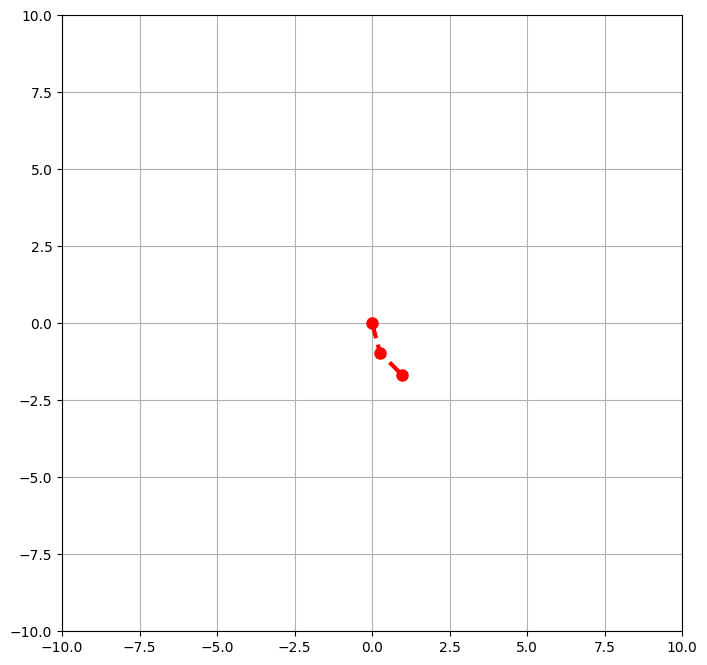

In [47]:
from matplotlib import animation
import matplotlib.pyplot as plt

def animate(frame):
    ln1.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('heavy_spring_linearized.gif', writer='pillow', fps=50)